#### 로지스틱 회귀

이진 분류

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 

Numpy를 사용하여 시그모이드 함수를 정의

 - 시그모이드는 x가 매우 커지면 1에 수렴, x가 작아지면 0에 수렴

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

In [4]:
x = np.arange(-5.0,5.0,0.1)
#w를 변화시켜보면서 추이를 살펴보자.
y1 = sigmoid(0.5*x)

y2 = sigmoid(x)

y3 = sigmoid(2*x)


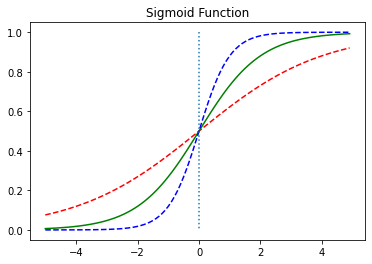

In [8]:
#각각 그림에 대한 객체를 생성합니다.
#x축, y축, 그리고 색깔입니다.
plt.plot(x,y1,'r',linestyle='--') #w가 0.5일 때

plt.plot(x,y2, 'g')

plt.plot(x,y3,'b', linestyle='--')


plt.plot([0,0],[1.0,0.0],':')

plt.title('Sigmoid Function')
plt.show()

 - W의 값이 커지면 그만큼 y에 대한 변동폭이 줄어들게 됩니다. 왜냐하면 -지수제곱이기 때문입니다. 

b(y절편)의 변화에 따른 좌, 우 이동

 - 이제 b의 값에 따라서 그래프가 어떻게 변하는지 확인해보겠습니다.

In [9]:
x = np.arange(-5.0,5.0,0.1)

y1 = sigmoid(x+0.5)

y2 = sigmoid(x+1.0)

y3 = sigmoid(x+1.5)

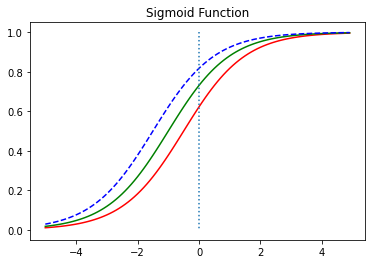

In [10]:
plt.plot(x,y1,'r')

plt.plot(x,y2,'g')

plt.plot(x,y3,'b',linestyle='--')

plt.plot([0,0],[1.0,0.0],':') # 가운데 점선을 추가합니다.

plt.title('Sigmoid Function')

plt.show()

3. 파이토치로 로지스틱 회귀 구현하기

In [11]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 

torch.manual_seed(1)

x_train, y_train을 선언

In [12]:
x_train = torch.FloatTensor([
    [1,2],
    [2,3],
    [3,1],
    [4,3],
    [5,3],
    [6,2]
])

y_train = torch.FloatTensor([
    [0],
    [0],
    [0],
    [1],
    [1],
    [1]
])

In [14]:
W = torch.zeros((2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

hypothesis = 1 / (1+torch.exp(-(x_train.matmul(W)+b)  )  )

In [16]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


- loss를 구하기

In [17]:
losses = -(y_train * torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [18]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


지금까지의 비용 함수를 직접 구했는데, 

사실 파이토치에서는 로지스틱 회귀 비용 함수를 이미 구현해서 제공하고 있습니다. 

In [19]:
F.binary_cross_entropy(hypothesis,y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

<<<<<<<<<<파이토치로 로지스틱 회귀 구현>>>>>>>>>>

In [21]:
print(x_train)
print(y_train)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [46]:
W = torch.zeros((2,1),requires_grad=True)
b = torch.zeros(1,requires_grad = True)

optimizer = optim.SGD([W,b],lr=1e-5)

In [47]:
nb_epochs = 1000

for epoch in range(nb_epochs+1):


    #가설 함수 h 정의
    #hypothesis_ = 1 / (1 + torch.exp(-(x_train.matmul(W) +b)))
    hypothesis = torch.sigmoid(x_train.matmul(W)+b)

    # Cost 정의 
    # 전체를 전부 더하고, 이에 대한 평균을 구합니다. 
    cost = - (y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1-hypothesis) ).mean()

    #모델 파라미터를 가지고 있는 최적화를,
    #각 모델 파라미터에 대해 초기화 합니다. 

    optimizer.zero_grad()

    #전체 비용을 각 parameter에 대하여, 미분을 합니다. 
    cost.backward()

    #미분을 통하여 업데이트된 parameter만큼 이제 optimizer를 step 시킵니다. 
    optimizer.step() 
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))   

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.692560
Epoch  200/1000 Cost: 0.691977
Epoch  300/1000 Cost: 0.691400
Epoch  400/1000 Cost: 0.690829
Epoch  500/1000 Cost: 0.690262
Epoch  600/1000 Cost: 0.689701
Epoch  700/1000 Cost: 0.689144
Epoch  800/1000 Cost: 0.688593
Epoch  900/1000 Cost: 0.688046
Epoch 1000/1000 Cost: 0.687505


In [48]:
optimized_hypothesis = torch.sigmoid(x_train.matmul(W)+b)

print(optimized_hypothesis)

tensor([[0.5026],
        [0.5049],
        [0.5059],
        [0.5085],
        [0.5104],
        [0.5118]], grad_fn=<SigmoidBackward0>)


In [49]:
print(optimized_hypothesis > 0.5)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True]])


In [43]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False]])


In [35]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [36]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [37]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
